# Part I - (Dataset Exploration Title)
## by (your name here)

## Introduction
> Introduce the dataset

>**Rubric Tip**: Your code should not generate any errors, and should use functions, loops where possible to reduce repetitive code. Prefer to use functions to reuse code statements.

> **Rubric Tip**: Document your approach and findings in markdown cells. Use comments and docstrings in code cells to document the code functionality.

>**Rubric Tip**: Markup cells should have headers and text that organize your thoughts, findings, and what you plan on investigating next.  



## Preliminary Wrangling


In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import ast
import json
import itertools 
from collections import Counter

%matplotlib inline

> Load in your dataset and describe its properties through the questions below. Try and motivate your exploration goals through this section.


In [2]:
new_movie_summary = pd.read_csv('tmdb_5000_movies.csv')
new_movie_credits = pd.read_csv('tmdb_5000_credits.csv')




### What is the objective of my project?  What questions am I trying to answer with my dataset?

> Through the data that I downloaded from Kaggle, I am interested to learn what are the characteristics that help ensure a high grossing movie.

> My project plan is as follows:

> <b>Data Cleaning</b>
> <li> Use the gathering, assessing and cleaning framework to first clean the data.  I will use some exploratory analysis as well to identify potential issues in the data.</li>

> <b> Data Exploration </b>
> <li> Review the cleaned data and look for insights that would help me answer my questions above.  Here I will use a mix of univariate, bivariate and multivariate analysis to look for patterns in the data.</li>

> <b> Data Explanation </b>
> <li> Using Part 2 of this project, I will present my analysis and findings in a slide show for the reader </li>


### What is the structure of your dataset?

> Let us look at the set up of the 2 tables in the dataset. The first table gives various details by movie.  The 2nd table gives further detail on the cast and crew.

### What questions do I want to answer with my dataset?

> The primary question is to understand what characteristics influence the highest grossing movies.  I will develop a list of specific questions around this main question as I wrangle the data.  My focus first is to do some preliminary exploration, understand the dataset, what types of questions I am interested in and if any early data cleaning issues to resolve to get to the insights to answer my questions.


### What is the shape of dataset?

> To understand the structure, I will look at: shape, first few rows, whether any null items (okay as long as not a field I am interested in), type of fields and if what I expect

> From below, the movie summary dataset has various details by movie.  It comprises 4803 rows and 20 columns.  The columns that are null are okay as I do not need them.  The key columns that I am interested in appear to be correct type.  However, one issue is that the genres and keywords, production companies, production countries, spoken languages are all shown as JSON format.  I would like to split this out.

In [3]:
# The table new_movie_summary includes various data for movies including genres, keywords, popularity, voting,
# production companies etc - this could all be useful to answer my main question above

new_movie_summary.head(2)

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500


In [4]:
# The table new_movie_credits has breakdown of the cast and crew.  These are stored as json format so will need
# to extract the informaton that I need

new_movie_credits.head(2)

,movie_id,title,cast,crew
0,19995,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,285,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."


In [5]:
def basic_analysis(df):
    print("Dataset has:", df.shape, " rows and columns\n");
    print("Summary info:\n", df.info(), "\n");
    print("Describe info: \n", df.describe(), "\n")
    print("Check for any null columns:\n", df.isna().sum(), "\n")
    print("field types: \n", df.dtypes, "\n")
    

In [6]:
# let's analyse the new_movie_summary table

basic_analysis(new_movie_summary)

Dataset has: (4803, 20)  rows and columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 20 columns):
budget                  4803 non-null int64
genres                  4803 non-null object
homepage                1712 non-null object
id                      4803 non-null int64
keywords                4803 non-null object
original_language       4803 non-null object
original_title          4803 non-null object
overview                4800 non-null object
popularity              4803 non-null float64
production_companies    4803 non-null object
production_countries    4803 non-null object
release_date            4802 non-null object
revenue                 4803 non-null int64
runtime                 4801 non-null float64
spoken_languages        4803 non-null object
status                  4803 non-null object
tagline                 3959 non-null object
title                   4803 non-null object
vote_average            4803 non-null flo

In [7]:
# now let's analyse the movie credits table

basic_analysis(new_movie_credits)

Dataset has: (4803, 4)  rows and columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 4 columns):
movie_id    4803 non-null int64
title       4803 non-null object
cast        4803 non-null object
crew        4803 non-null object
dtypes: int64(1), object(3)
memory usage: 150.2+ KB
Summary info:
 None 

Describe info: 
             movie_id
count    4803.000000
mean    57165.484281
std     88694.614033
min         5.000000
25%      9014.500000
50%     14629.000000
75%     58610.500000
max    459488.000000 

Check for any null columns:
 movie_id    0
title       0
cast        0
crew        0
dtype: int64 

field types: 
 movie_id     int64
title       object
cast        object
crew        object
dtype: object 



### Initial Data Cleaning Phase

> I will start with some initial cleaning of data

> Initial issues from looking at data above:
><li>Data is in two tables - migrate to one table
><li>Cast, Genres, Keywords, Production Countries and companies, Spoken languages columns are json. Convert to dictionaries.
><li>Crew column is json format and also has some information embedded I want to extract into separate columns eg. director, producer, writer
><li>Date columns are not datetype - convert
><li>There are some null rows but on investigation these are not important to my analysis.  The only one I want to fix is the release date column as I want to use that for some analysis later.  The rest are not important for now.



In [8]:
# merge tables on key 'id'
movie_df = pd.merge(new_movie_summary, new_movie_credits, left_on = 'id', right_on = 'movie_id')
movie_df.head(2)

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,spoken_languages,status,tagline,title_x,vote_average,vote_count,movie_id,title_y,cast,crew
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...",...,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,19995,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...",...,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,285,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."


In [9]:
# convert json columns as mentioned above into JSON format.

# note to teacher:  code below to convert is based on research and similar code I found on Kaggle at:
# https://www.kaggle.com/code/rafffael/geting-started-movie-recommendation-with-eda-demo

json_columns = {'cast', 'genres', 'keywords', 'production_countries', 
                'production_companies', 'spoken_languages'}

for c in json_columns:
    movie_df[c] = movie_df[c].apply(json.loads)
    
    #for these columns extracts the data after name which is data I want
    movie_df[c] = movie_df[c].apply(lambda row: [x["name"] for x in row])
    
        

In [10]:
# transform crew column as normal list of dictionaries via Json

movie_df['crew'] = movie_df['crew'].apply(json.loads)

In [11]:
# at moment crew, each row of crew column is a list of dictionaries.  Let me look at one example:

movie_df['crew'][0]

[{'credit_id': '52fe48009251416c750aca23',
  'department': 'Editing',
  'gender': 0,
  'id': 1721,
  'job': 'Editor',
  'name': 'Stephen E. Rivkin'},
 {'credit_id': '539c47ecc3a36810e3001f87',
  'department': 'Art',
  'gender': 2,
  'id': 496,
  'job': 'Production Design',
  'name': 'Rick Carter'},
 {'credit_id': '54491c89c3a3680fb4001cf7',
  'department': 'Sound',
  'gender': 0,
  'id': 900,
  'job': 'Sound Designer',
  'name': 'Christopher Boyes'},
 {'credit_id': '54491cb70e0a267480001bd0',
  'department': 'Sound',
  'gender': 0,
  'id': 900,
  'job': 'Supervising Sound Editor',
  'name': 'Christopher Boyes'},
 {'credit_id': '539c4a4cc3a36810c9002101',
  'department': 'Production',
  'gender': 1,
  'id': 1262,
  'job': 'Casting',
  'name': 'Mali Finn'},
 {'credit_id': '5544ee3b925141499f0008fc',
  'department': 'Sound',
  'gender': 2,
  'id': 1729,
  'job': 'Original Music Composer',
  'name': 'James Horner'},
 {'credit_id': '52fe48009251416c750ac9c3',
  'department': 'Directing',
  

In [12]:
# create a function that I can use with apply (which applies row by row) which goes through a row, analyses each
# dictionary in that row and extracts the key jobs I am interested in.  Store this temporarily in 
# a dictionary

def extract_info(row):
    
    # create empty dictionary to hold data
    
    info_dict = {}
    
    for item in row:
        
        if item.get('job'):
            
            if item['job'] in ["Director", "Producer", "Executive Producer", "Screenplay"]:
                
                info_dict[item['job']] = item['name']
    return info_dict

In [13]:
# now create a new dataframe that stores the jobs I am intersted in above.  Later I will join this with original table.

extract_df = movie_df['crew'].apply(lambda x: extract_info(x)).apply(pd.Series)


In [14]:
# now join back to same table (they will have same index)

finalmovie_df = pd.merge(movie_df, extract_df, right_index=True, left_index=True)


In [15]:
#for my analysis would like to store month and year of movie release to check for seasonal trends.  Note, I based this
# code on similar code I found on Kaggle when researching how to convert date types. 
# Source: https://www.kaggle.com/code/rafffael/geting-started-movie-recommendation-with-eda-demo

finalmovie_df['release_date'] = pd.to_datetime(finalmovie_df['release_date'])

In [16]:
# from the earlier analysis above, there was a null column in release date.  I would like to fix to help my analysis later.

finalmovie_df[finalmovie_df['release_date'].isna()]



,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,vote_average,vote_count,movie_id,title_y,cast,crew,Director,Producer,Screenplay,Executive Producer
4553,0,[],NaN,380097,[],en,America Is Still the Place,1971 post civil rights San Francisco seemed li...,0.0,[],...,0.0,0,380097,America Is Still the Place,[],[],NaN,NaN,NaN,NaN


In [17]:
# as this is just one row, I will drop it

index_names = finalmovie_df[finalmovie_df['release_date'].isna()].index
finalmovie_df.drop(index_names, inplace = True)

# check no more null release dates

finalmovie_df[finalmovie_df['release_date'].isna()]

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,vote_average,vote_count,movie_id,title_y,cast,crew,Director,Producer,Screenplay,Executive Producer


In [18]:
finalmovie_df.head(2)


,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,vote_average,vote_count,movie_id,title_y,cast,crew,Director,Producer,Screenplay,Executive Producer
0,237000000,"[Action, Adventure, Fantasy, Science Fiction]",http://www.avatarmovie.com/,19995,"[culture clash, future, space war, space colon...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[Ingenious Film Partners, Twentieth Century Fo...",...,7.2,11800,19995,Avatar,"[Sam Worthington, Zoe Saldana, Sigourney Weave...","[{'credit_id': '52fe48009251416c750aca23', 'de...",James Cameron,Jon Landau,James Cameron,Laeta Kalogridis
1,300000000,"[Adventure, Fantasy, Action]",http://disney.go.com/disneypictures/pirates/,285,"[ocean, drug abuse, exotic island, east india ...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[Walt Disney Pictures, Jerry Bruckheimer Films...",...,6.9,4500,285,Pirates of the Caribbean: At World's End,"[Johnny Depp, Orlando Bloom, Keira Knightley, ...","[{'credit_id': '52fe4232c3a36847f800b579', 'de...",Gore Verbinski,Pat Sandston,Terry Rossio,Mike Stenson


In [19]:
# now also store release year and month separately as will make easier to create charts later.
# the code below is from same Kaggle source I have mentioned above.

finalmovie_df['release_year'] = finalmovie_df['release_date'].dt.year
finalmovie_df['release_month'] = finalmovie_df['release_date'].dt.month_name()

In [20]:
# let's look at final dataset
finalmovie_df.head(2).T

,0,1
budget,237000000,300000000
genres,"[Action, Adventure, Fantasy, Science Fiction]","[Adventure, Fantasy, Action]"
homepage,http://www.avatarmovie.com/,http://disney.go.com/disneypictures/pirates/
id,19995,285
keywords,"[culture clash, future, space war, space colon...","[ocean, drug abuse, exotic island, east india ..."
original_language,en,en
original_title,Avatar,Pirates of the Caribbean: At World's End
overview,"In the 22nd century, a paraplegic Marine is di...","Captain Barbossa, long believed to be dead, ha..."
popularity,150.438,139.083
production_companies,"[Ingenious Film Partners, Twentieth Century Fo...","[Walt Disney Pictures, Jerry Bruckheimer Films..."


### Question: What movies gross more than 1bn of revenue?  Who are the top directors of these movies?

In [21]:

print("number of movies with >$1bn revenue is: ", finalmovie_df.query('revenue > 1000000')['id'].count())
largestmovies_df = finalmovie_df.nlargest(3183, 'revenue')
largestmovies_df_top100 = finalmovie_df.nlargest(100, 'revenue')

number of movies with >$1bn revenue is:  3183


In [23]:
largestmovies_df['Director'].value_counts()

Steven Spielberg             26
Clint Eastwood               20
Ridley Scott                 16
Martin Scorsese              16
Steven Soderbergh            14
Robert Zemeckis              13
Oliver Stone                 13
Tim Burton                   13
Joel Schumacher              13
Renny Harlin                 13
Tony Scott                   12
Michael Bay                  12
Robert Rodriguez             12
Woody Allen                  12
Richard Donner               11
Ron Howard                   11
Peter Farrelly               11
Kevin Smith                  11
Brian De Palma               11
Paul W.S. Anderson           10
Wes Craven                   10
Rob Reiner                   10
Shawn Levy                   10
Richard Linklater            10
David Fincher                10
Francis Ford Coppola         10
Barry Levinson                9
Spike Lee                     9
Rob Cohen                     9
John Carpenter                9
                             ..
Dexter F

### Observation: as can be seen from sorted list above there are certain directors that have > 10 movies grossing >1bn.  These would be interesting movies to analyse to see if there are themes

In [24]:
# let me store top directors with more than 10 $1bn grossing movies - will be useful later as these directors
# have consistently directed top movies

top_directors = ['Steven Spielberg','Clint Eastwood',
                 'Martin Scorsese','Ridley Scott','Steven Soderbergh',
                 'Joel Schumacher','Renny Harlin','Oliver Stone',
                 'Tim Burton','Robert Zemeckis','Tony Scott',
                 'Robert Rodriguez','Woody Allen','Michael Bay',
                 'Peter Farrelly','Brian De Palma','Richard Donner',
                 'Kevin Smith','Ron Howard','Francis Ford Coppola',
                 'Paul W.S. Anderson','David Fincher','Richard Linklater',
                 'Shawn Levy','Wes Craven','Rob Reiner']

largestmovies_topdirectors_df = largestmovies_df[largestmovies_df['Director'].isin(top_directors)]
largestmovies_topdirectors_df.head(2)








,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,movie_id,title_y,cast,crew,Director,Producer,Screenplay,Executive Producer,release_year,release_month
52,195000000,"[Action, Science Fiction, Adventure]",http://www.transformersmovie.com/,38356,"[moon, spacecraft, traitor, bodyguard, alien p...",en,Transformers: Dark of the Moon,Sam Witwicky takes his first tenuous steps int...,28.529607,"[Paramount Pictures, Di Bonaventura Pictures, ...",...,38356,Transformers: Dark of the Moon,"[Shia LaBeouf, John Malkovich, Ken Jeong, Fran...","[{'credit_id': '537f0b740e0a2624b40044d0', 'de...",Michael Bay,Tom DeSanto,Ehren Kruger,Michael Bay,2011,June
36,210000000,"[Science Fiction, Action, Adventure]",http://www.transformersmovie.com,91314,"[sequel, alien, transformers, giant robot, rob...",en,Transformers: Age of Extinction,"As humanity picks up the pieces, following the...",116.840296,"[Paramount Pictures, Amblin Entertainment, Di ...",...,91314,Transformers: Age of Extinction,"[Mark Wahlberg, Stanley Tucci, Kelsey Grammer,...","[{'credit_id': '546c7de8c3a368096b001181', 'de...",Michael Bay,Tom DeSanto,Ehren Kruger,Mark Vahradian,2014,June



### What is/are the main feature(s) of interest in your dataset?

> The main features that would help me understand what impacts highest grossing movies are: Revenue, Budget, Genre of Movie, Popularity, Vote Average, Production companies and countries where films were made.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> The main columns of interest that would help me understand highest grossing movies are:

Movie Summary Dataset

<li>Budget</li>
<li>Genres</li>
<li>Keywords</li>
<li>Popularity</li>
<li>Production Companies</li>
<li>Production Countries</li>
<li>Revenue</li>
<li>Vote Average</li>
<li>Vote Count</li>

Movie Credits Dataset
<li>Actor</li>
<li>Director</li>


## Univariate Exploration

> In this section, investigate distributions of individual variables. If
you see unusual points or outliers, take a deeper look to clean things up
and prepare yourself to look at relationships between variables.


> **Rubric Tip**: The project (Parts I alone) should have at least 15 visualizations distributed over univariate, bivariate, and multivariate plots to explore many relationships in the data set.  Use reasoning to justify the flow of the exploration.



>**Rubric Tip**: Use the "Question-Visualization-Observations" framework  throughout the exploration. This framework involves **asking a question from the data, creating a visualization to find answers, and then recording observations after each visualisation.** 


### What questions do I want to explore in the Univariate phase?
>   <li> Which movies generated the most revenue?
    <li> For movies that generated the most revenue:
    <li> Whom were the directors, producers, writers etc?
    <li>what are the frequency of director, producer, writer, other relevant themes for the highest grossing movies? Any patterns?
        <li> Whom were the most frequent actors in the top grossing movies?
        <li> What were the most common keywords?
        <li> What were the most common genres?
        <li> What was the vote average distribution?
        <li> What was the vote count distribution?
        <li> Whom were the most common production companies for the top movies?


### Question: Which movies generated the most revenue?

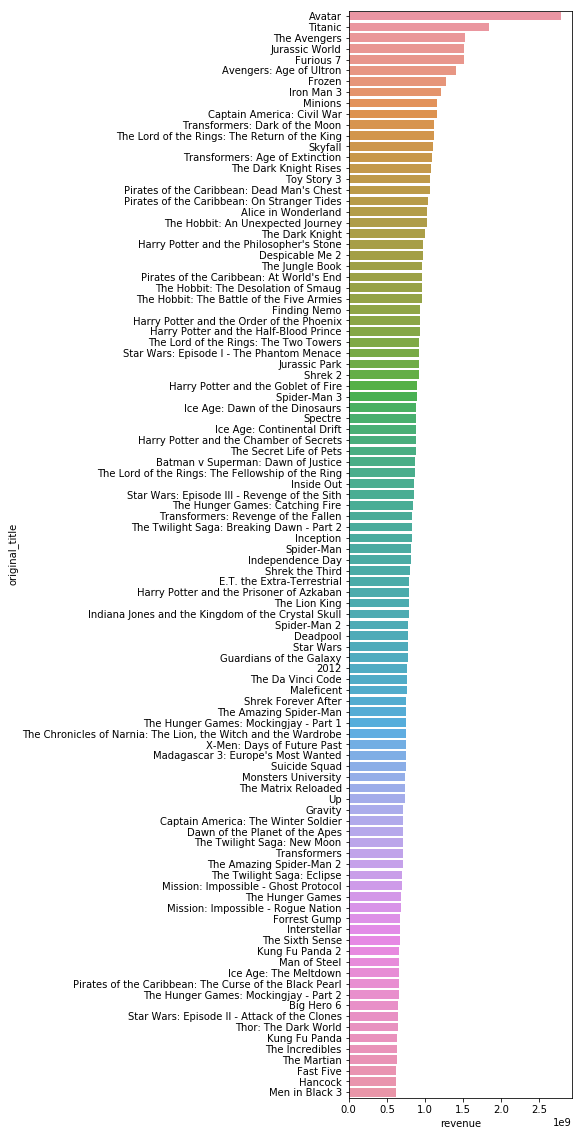

In [25]:
# which movies generated the most revenue.  I will focus on the top 100

top_revenue_df = largestmovies_df.nlargest(100, 'revenue').sort_values(by=['revenue'], ascending=False)[['original_title', 'revenue']]
plt.figure(figsize=(4,20))
sb.barplot(data=top_revenue_df, y='original_title', x='revenue')

### Observation: 
> <li>Avatar and Titanic (both James Cameron movies) have generated the most revenue
> <li>There are some themes.  The Marvel movies (eg. Avengers, Iron Man etc), Transformers, Pirates of Carribean, Lord of Rings franchises have done consistently well on revenue


### What was the frequency of directors for largest movies

In [26]:
largestmovies_df['Director'].value_counts()

Steven Spielberg             26
Clint Eastwood               20
Ridley Scott                 16
Martin Scorsese              16
Steven Soderbergh            14
Robert Zemeckis              13
Oliver Stone                 13
Tim Burton                   13
Joel Schumacher              13
Renny Harlin                 13
Tony Scott                   12
Michael Bay                  12
Robert Rodriguez             12
Woody Allen                  12
Richard Donner               11
Ron Howard                   11
Peter Farrelly               11
Kevin Smith                  11
Brian De Palma               11
Paul W.S. Anderson           10
Wes Craven                   10
Rob Reiner                   10
Shawn Levy                   10
Richard Linklater            10
David Fincher                10
Francis Ford Coppola         10
Barry Levinson                9
Spike Lee                     9
Rob Cohen                     9
John Carpenter                9
                             ..
Dexter F

### Question: what are the frequency of director, producer, writer, other relevant themes for the highest grossing movies? Any patterns?

> I will write some code to plot bar charts for the top movies for each of these areas to see any patterns


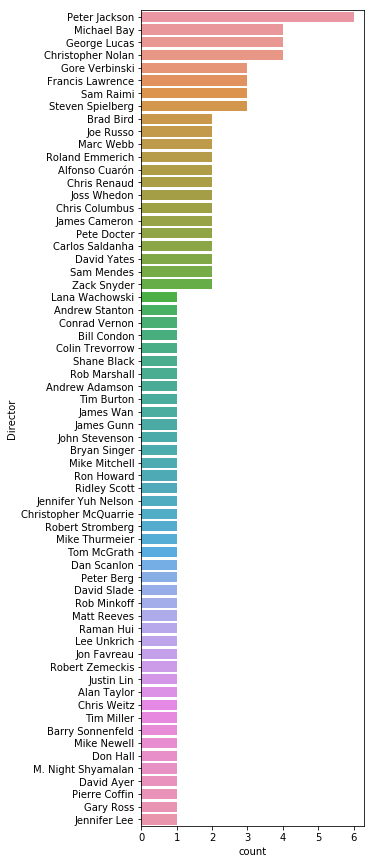

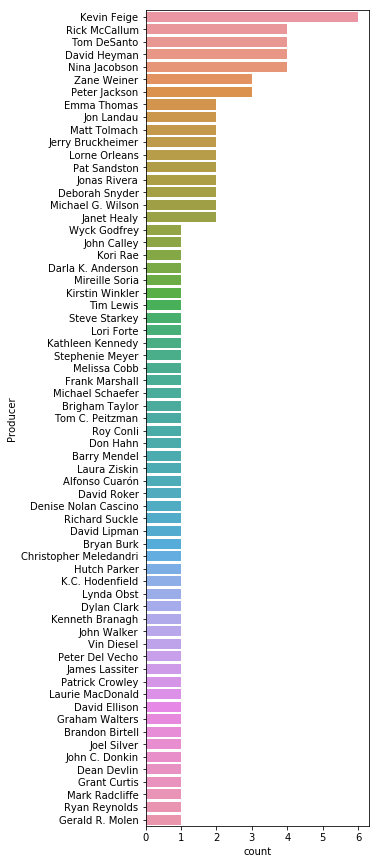

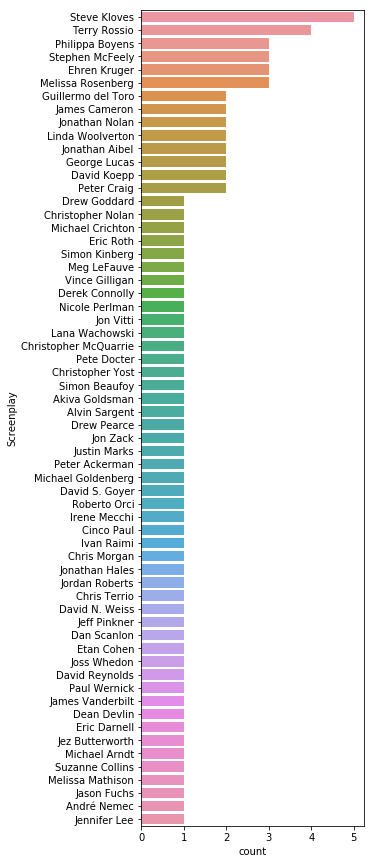

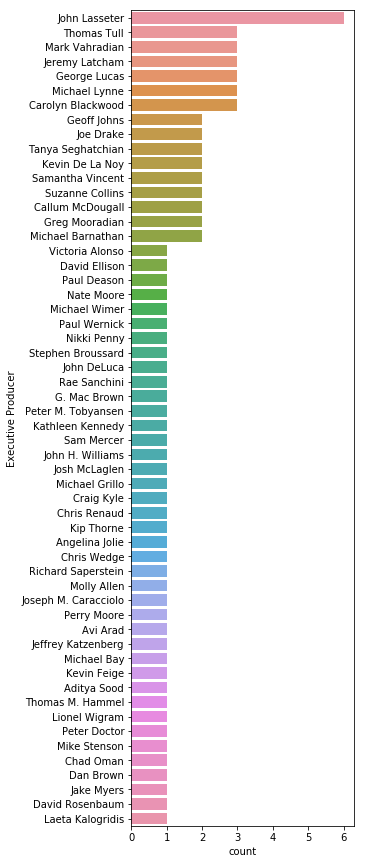

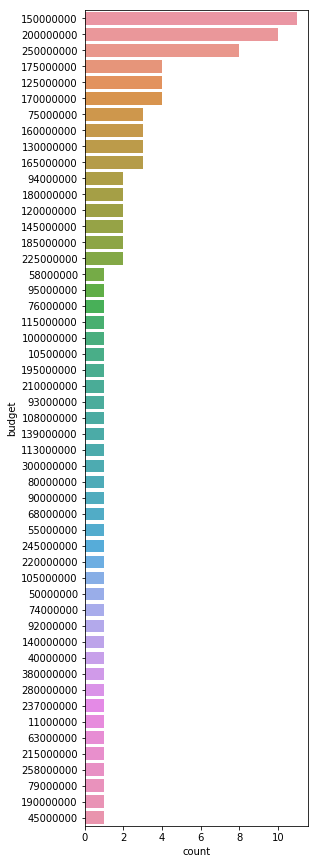

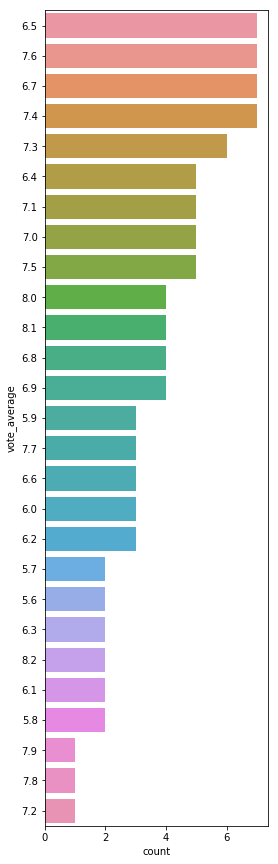

In [27]:
columns_to_check = ['Director', 'Producer', 'Screenplay', 'Executive Producer', 'budget', 'vote_average']

for col in columns_to_check:
    plt.figure(figsize=(4,15)) 
    sb.countplot(data=largestmovies_df_top100, y=col, order = largestmovies_df_top100[col].value_counts().index);



>**Rubric Tip**: Visualizations should depict the data appropriately so that the plots are easily interpretable. You should choose an appropriate plot type, data encodings, and formatting as needed. The formatting may include setting/adding the title, labels, legend, and comments. Also, do not overplot or incorrectly plot ordinal data.

In [28]:
def count_words(df, col):
    
    frequencyDict = dict()
    visited = set()

    for row in df[col]:
        for item in row:

            # check if keyword already in dictionary.  If yes, then increment counter.

            if item in frequencyDict:
                frequencyDict[item] +=1
            else:
                frequencyDict[item] = 1
    
    # now let's sort the dictionary before returning it
    
    myDict = sorted(frequencyDict.items(), key=lambda x:x[1], reverse=True)
    sortedDict = dict(myDict)
    
    return sortedDict


In [29]:
def return_top_dict_items(original_dict, top_items):
    
    return dict(itertools.islice(original_dict.items(), top_items)) 


In [40]:
count_words(largestmovies_df, 'keywords')

{'duringcreditsstinger': 269,
 'based on novel': 173,
 'woman director': 160,
 'aftercreditsstinger': 151,
 'murder': 132,
 'dystopia': 125,
 'violence': 119,
 'independent film': 106,
 '3d': 91,
 'sequel': 88,
 'revenge': 88,
 'sport': 87,
 'biography': 81,
 'friendship': 79,
 'teenager': 74,
 'los angeles': 74,
 'musical': 73,
 'alien': 70,
 'love': 67,
 'new york': 67,
 'police': 66,
 'sex': 64,
 'superhero': 60,
 'suspense': 60,
 'london england': 57,
 'dying and death': 56,
 'prison': 56,
 'high school': 54,
 'family': 52,
 'based on comic book': 51,
 'magic': 50,
 'drug': 50,
 'nudity': 50,
 'daughter': 49,
 'world war ii': 48,
 'remake': 46,
 'father son relationship': 46,
 'kidnapping': 45,
 'airplane': 45,
 'escape': 44,
 'wedding': 44,
 'corruption': 43,
 'serial killer': 43,
 'hospital': 42,
 'based on true story': 42,
 'martial arts': 41,
 'cia': 41,
 'fbi': 40,
 'future': 39,
 'based on young adult novel': 39,
 'explosion': 39,
 'investigation': 39,
 'lawyer': 39,
 "love o

In [31]:
top_keywords_num = 40
keywords_summary = count_words(largestmovies_df, 'keywords')
topkeywords = return_top_dict_items(keywords_summary, top_keywords_num)

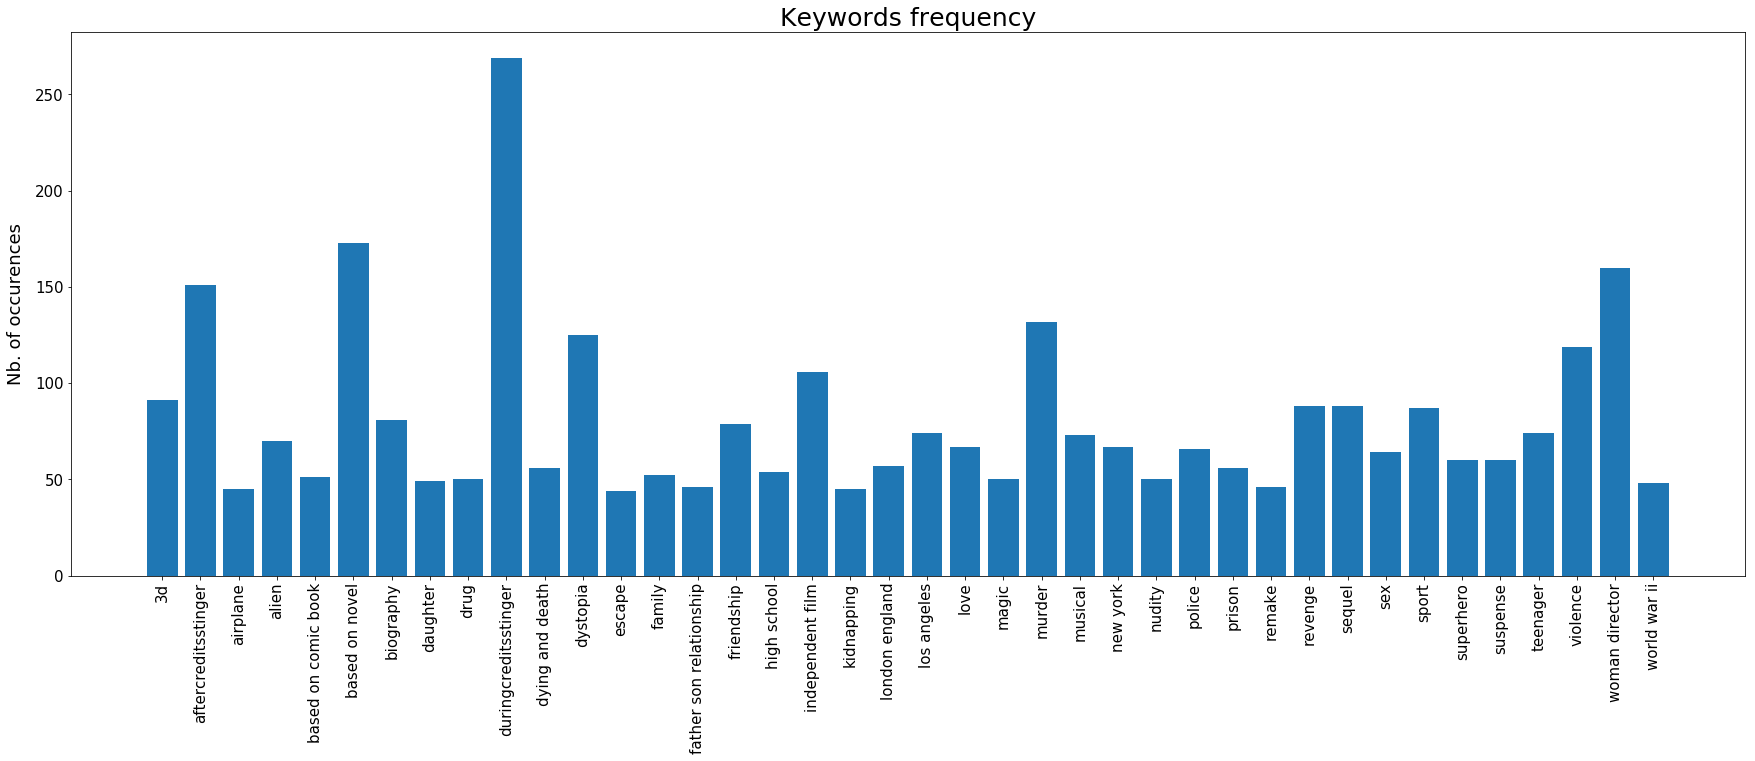

In [32]:
plt.figure(figsize=(30, 10))
plt.xticks(rotation=90, fontsize=15)
plt.yticks(fontsize=15)
plt.ylabel("Nb. of occurences", fontsize=18, labelpad=10)
plt.bar(topkeywords.keys(), topkeywords.values(), align='center')
plt.title("Keywords frequency", fontsize=25)
plt.show()

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> Your answer here!

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> Your answer here!

## Bivariate Exploration

> In this section, investigate relationships between pairs of variables in your
data. Make sure the variables that you cover here have been introduced in some
fashion in the previous section (univariate exploration).

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> Your answer here!

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> Your answer here!

## Multivariate Exploration

> Create plots of three or more variables to investigate your data even
further. Make sure that your investigations are justified, and follow from
your work in the previous sections.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> Your answer here!

### Were there any interesting or surprising interactions between features?

> Your answer here!

## Conclusions
>You can write a summary of the main findings and reflect on the steps taken during the data exploration.



> Remove all Tips mentioned above, before you convert this notebook to PDF/HTML


> At the end of your report, make sure that you export the notebook as an
html file from the `File > Download as... > HTML or PDF` menu. Make sure you keep
track of where the exported file goes, so you can put it in the same folder
as this notebook for project submission. Also, make sure you remove all of
the quote-formatted guide notes like this one before you finish your report!

